<h2>Second Try of Feature Engineering</h2>

- Focus will be on testing the coding and engineering the regime detections (El Nino and La Nina)

In [35]:
import pandas as pd

In [36]:
raw_data = pd.read_csv('Data/corn_climate_risk_futures_daily_master.csv')
raw_data.head(5)

,ID,crop_name,country_name,country_code,region_name,region_id,harvest_period,growing_season_year,date_on,climate_risk_cnt_locations_heat_stress_risk_low,...,futures_zc1_ma_120,futures_zc1_vol_20,futures_zc1_vol_60,futures_zw_zc_spread,futures_zc_zw_ratio,futures_zs_zc_spread,futures_zc_zs_ratio,date_on_year,date_on_month,date_on_year_month
0,8af42722-3f05-4ede-80fc-605e0e2b3b67,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-15,23,...,375.014583,0.013520,0.015724,48.50,0.898429,727.00,0.371107,2016,6,2016_06
1,54f4ddc5-e7ab-4bfb-ad6a-5649841af563,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-16,23,...,375.512500,0.013799,0.015792,47.25,0.900000,709.25,0.374835,2016,6,2016_06
2,63a41fce-d371-4295-a58a-dc6491664020,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-17,23,...,376.122917,0.013442,0.016145,43.50,0.909610,721.75,0.377533,2016,6,2016_06
3,cddfa440-e0eb-4735-beb1-1aca2afefe53,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-18,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,6,2016_06
4,3eaacfe1-29be-4da9-b5c9-a9457d2d2b83,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-19,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,6,2016_06


In [37]:
raw_data.columns

Index(['ID', 'crop_name', 'country_name', 'country_code', 'region_name',
       'region_id', 'harvest_period', 'growing_season_year', 'date_on',
       'climate_risk_cnt_locations_heat_stress_risk_low',
       'climate_risk_cnt_locations_heat_stress_risk_medium',
       'climate_risk_cnt_locations_heat_stress_risk_high',
       'climate_risk_cnt_locations_unseasonably_cold_risk_low',
       'climate_risk_cnt_locations_unseasonably_cold_risk_medium',
       'climate_risk_cnt_locations_unseasonably_cold_risk_high',
       'climate_risk_cnt_locations_excess_precip_risk_low',
       'climate_risk_cnt_locations_excess_precip_risk_medium',
       'climate_risk_cnt_locations_excess_precip_risk_high',
       'climate_risk_cnt_locations_drought_risk_low',
       'climate_risk_cnt_locations_drought_risk_medium',
       'climate_risk_cnt_locations_drought_risk_high', 'futures_close_ZC_1',
       'futures_close_ZC_2', 'futures_close_ZW_1', 'futures_close_ZS_1',
       'futures_zc1_ret_pct', 'futur

In [38]:
raw_data['sum_of_medium_high_drought_risk'] = raw_data['climate_risk_cnt_locations_drought_risk_medium'] + raw_data['climate_risk_cnt_locations_drought_risk_high']
raw_data['sum_of_medium_high_excess_precip_risk'] = raw_data['climate_risk_cnt_locations_excess_precip_risk_medium'] + raw_data['climate_risk_cnt_locations_excess_precip_risk_high']
raw_data['sum_of_medium_high_unseasonably_cold_risk'] = raw_data['climate_risk_cnt_locations_unseasonably_cold_risk_medium'] + raw_data['climate_risk_cnt_locations_unseasonably_cold_risk_high']
raw_data['sum_of_medium_high_heat_stress_risk'] = raw_data['climate_risk_cnt_locations_heat_stress_risk_medium'] + raw_data['climate_risk_cnt_locations_heat_stress_risk_high']

raw_data.head()

,ID,crop_name,country_name,country_code,region_name,region_id,harvest_period,growing_season_year,date_on,climate_risk_cnt_locations_heat_stress_risk_low,...,futures_zc_zw_ratio,futures_zs_zc_spread,futures_zc_zs_ratio,date_on_year,date_on_month,date_on_year_month,sum_of_medium_high_drought_risk,sum_of_medium_high_excess_precip_risk,sum_of_medium_high_unseasonably_cold_risk,sum_of_medium_high_heat_stress_risk
0,8af42722-3f05-4ede-80fc-605e0e2b3b67,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-15,23,...,0.898429,727.00,0.371107,2016,6,2016_06,7,0,0,0
1,54f4ddc5-e7ab-4bfb-ad6a-5649841af563,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-16,23,...,0.900000,709.25,0.374835,2016,6,2016_06,9,0,0,0
2,63a41fce-d371-4295-a58a-dc6491664020,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-17,23,...,0.909610,721.75,0.377533,2016,6,2016_06,9,0,9,0
3,cddfa440-e0eb-4735-beb1-1aca2afefe53,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-18,23,...,NaN,NaN,NaN,2016,6,2016_06,8,0,3,0
4,3eaacfe1-29be-4da9-b5c9-a9457d2d2b83,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-19,23,...,NaN,NaN,NaN,2016,6,2016_06,7,0,2,0


In [41]:
raw_data['sum_of_medium_high_drought_risk_lag_1yr'] = raw_data['sum_of_medium_high_drought_risk'].shift(365)
raw_data['sum_of_medium_high_excess_precip_risk_lag_1yr'] = raw_data['sum_of_medium_high_excess_precip_risk'].shift(365)
raw_data['sum_of_medium_high_unseasonably_cold_risk_lag_1yr'] = raw_data['sum_of_medium_high_unseasonably_cold_risk'].shift(365)
raw_data['sum_of_medium_high_heat_stress_risk_lag_1yr'] = raw_data['sum_of_medium_high_heat_stress_risk'].shift(365)

raw_data['sum_of_medium_high_drought_risk_lag_1yr'] = raw_data['sum_of_medium_high_drought_risk_lag_1yr'].fillna(0)
raw_data['sum_of_medium_high_excess_precip_risk_lag_1yr'] = raw_data['sum_of_medium_high_excess_precip_risk_lag_1yr'].fillna(0)
raw_data['sum_of_medium_high_unseasonably_cold_risk_lag_1yr'] = raw_data['sum_of_medium_high_unseasonably_cold_risk_lag_1yr'].fillna(0)
raw_data['sum_of_medium_high_heat_stress_risk_lag_1yr'] = raw_data['sum_of_medium_high_heat_stress_risk_lag_1yr'].fillna(0)

raw_data.head()

,ID,crop_name,country_name,country_code,region_name,region_id,harvest_period,growing_season_year,date_on,climate_risk_cnt_locations_heat_stress_risk_low,...,date_on_month,date_on_year_month,sum_of_medium_high_drought_risk,sum_of_medium_high_excess_precip_risk,sum_of_medium_high_unseasonably_cold_risk,sum_of_medium_high_heat_stress_risk,sum_of_medium_high_drought_risk_lag_1yr,sum_of_medium_high_excess_precip_risk_lag_1yr,sum_of_medium_high_unseasonably_cold_risk_lag_1yr,sum_of_medium_high_heat_stress_risk_lag_1yr
0,8af42722-3f05-4ede-80fc-605e0e2b3b67,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-15,23,...,6,2016_06,7,0,0,0,0.0,0.0,0.0,0.0
1,54f4ddc5-e7ab-4bfb-ad6a-5649841af563,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-16,23,...,6,2016_06,9,0,0,0,0.0,0.0,0.0,0.0
2,63a41fce-d371-4295-a58a-dc6491664020,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-17,23,...,6,2016_06,9,0,9,0,0.0,0.0,0.0,0.0
3,cddfa440-e0eb-4735-beb1-1aca2afefe53,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-18,23,...,6,2016_06,8,0,3,0,0.0,0.0,0.0,0.0
4,3eaacfe1-29be-4da9-b5c9-a9457d2d2b83,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-19,23,...,6,2016_06,7,0,2,0,0.0,0.0,0.0,0.0


In [ ]:
raw_data['diff_drought'] = raw_data['sum_of_medium_high_drought_risk'] - raw_data['sum_of_medium_high_drought_risk_lag_1yr']
raw_data['diff_excessprep'] = raw_data['sum_of_medium_high_excess_precip_risk'] - raw_data['sum_of_medium_high_excess_precip_risk_lag_1yr']
raw_data['diff_cold'] = raw_data['sum_of_medium_high_unseasonably_cold_risk'] - raw_data['sum_of_medium_high_unseasonably_cold_risk_lag_1yr']
raw_data['diff_heatstress'] = raw_data['sum_of_medium_high_heat_stress_risk'] - raw_data['sum_of_medium_high_heat_stress_risk_lag_1yr']

In [ ]:
raw_data.head() #for the first 365 days we have biased. since sum - 0 = huge_diff

,ID,crop_name,country_name,country_code,region_name,region_id,harvest_period,growing_season_year,date_on,climate_risk_cnt_locations_heat_stress_risk_low,...,sum_of_medium_high_unseasonably_cold_risk,sum_of_medium_high_heat_stress_risk,sum_of_medium_high_drought_risk_lag_1yr,sum_of_medium_high_excess_precip_risk_lag_1yr,sum_of_medium_high_unseasonably_cold_risk_lag_1yr,sum_of_medium_high_heat_stress_risk_lag_1yr,diff_drought,diff_excessprep,diff_cold,diff_heatstress
0,8af42722-3f05-4ede-80fc-605e0e2b3b67,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-15,23,...,0,0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
1,54f4ddc5-e7ab-4bfb-ad6a-5649841af563,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-16,23,...,0,0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0
2,63a41fce-d371-4295-a58a-dc6491664020,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-17,23,...,9,0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0
3,cddfa440-e0eb-4735-beb1-1aca2afefe53,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-18,23,...,3,0,0.0,0.0,0.0,0.0,8.0,0.0,3.0,0.0
4,3eaacfe1-29be-4da9-b5c9-a9457d2d2b83,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-19,23,...,2,0,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0


- Exporters: United States, Ukraine, Brazil, Canada, Argentina
- Importers: China, Mexico
- Neither: Russia, India

- Exporters Factor: United States (1.5), Ukraine (1.2), Canada (1.2), Argentina (1.2), Brazil (1.2)
- Importers Factor: China (0.7), Mexico (0.8)
- Neither Factor: Russia (1), India (1)

In [51]:
import numpy as np

In [54]:
raw_data['climate_risk_worse_than_forecasting'] = np.where(
    raw_data['diff_drought'] > 1,
    1,
    0
)

raw_data['climate_risk_better_than_forecasting'] = np.where(
    raw_data['diff_drought'] < -1,
    1,
    0
)
raw_data


,ID,crop_name,country_name,country_code,region_name,region_id,harvest_period,growing_season_year,date_on,climate_risk_cnt_locations_heat_stress_risk_low,...,sum_of_medium_high_drought_risk_lag_1yr,sum_of_medium_high_excess_precip_risk_lag_1yr,sum_of_medium_high_unseasonably_cold_risk_lag_1yr,sum_of_medium_high_heat_stress_risk_lag_1yr,diff_drought,diff_excessprep,diff_cold,diff_heatstress,climate_risk_worse_than_forecasting,climate_risk_better_than_forecasting
0,8af42722-3f05-4ede-80fc-605e0e2b3b67,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-15,23,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1,0
1,54f4ddc5-e7ab-4bfb-ad6a-5649841af563,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-16,23,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1,0
2,63a41fce-d371-4295-a58a-dc6491664020,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-17,23,...,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0,1,0
3,cddfa440-e0eb-4735-beb1-1aca2afefe53,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-18,23,...,0.0,0.0,0.0,0.0,8.0,0.0,3.0,0.0,1,0
4,3eaacfe1-29be-4da9-b5c9-a9457d2d2b83,Corn: Commodity Tracked,Argentina,AR,Buenos Aires,bffad37a-7c60-432f-984a-8ea83a944311,Harvest,2017,2016-06-19,23,...,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320656,2e5ef4bc-4a33-45d1-86e7-6e45476c7b67,Corn: Commodity Tracked,United States,US,Wisconsin,216ae69a-e4e3-4319-a408-54b9fb807570,Off-season,2026,2025-12-12,7,...,7.0,0.0,0.0,0.0,-7.0,1.0,7.0,0.0,0,1
320657,8d21c879-d756-4d0f-aed4-a87f7ae74f02,Corn: Commodity Tracked,United States,US,Wisconsin,216ae69a-e4e3-4319-a408-54b9fb807570,Off-season,2026,2025-12-13,7,...,6.0,0.0,0.0,0.0,-6.0,0.0,7.0,0.0,0,1
320658,c42f9a0e-4030-4332-925f-89365a643f55,Corn: Commodity Tracked,United States,US,Wisconsin,216ae69a-e4e3-4319-a408-54b9fb807570,Off-season,2026,2025-12-14,7,...,6.0,1.0,0.0,0.0,-6.0,-1.0,7.0,0.0,0,1
320659,0b23d369-fc09-4895-be6f-1bb6bfac9c6b,Corn: Commodity Tracked,United States,US,Wisconsin,216ae69a-e4e3-4319-a408-54b9fb807570,Off-season,2026,2025-12-15,7,...,1.0,1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0,0


In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

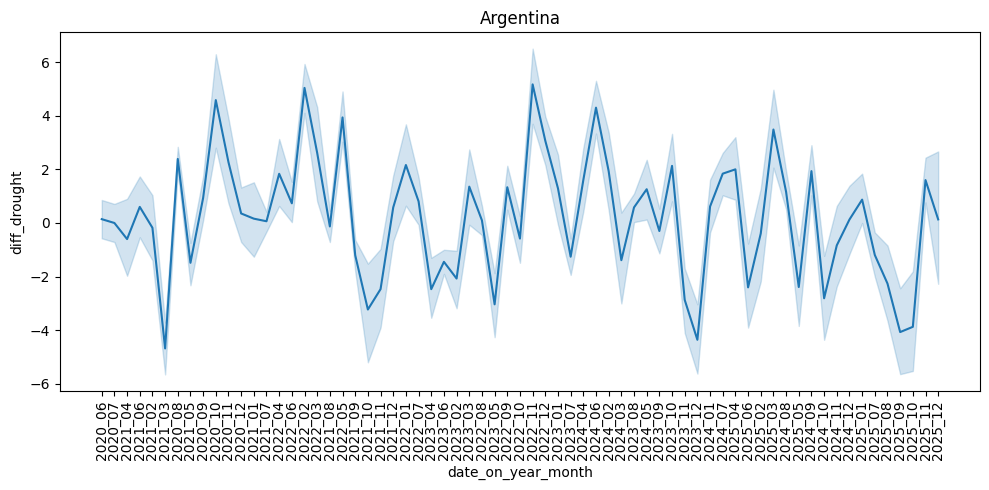

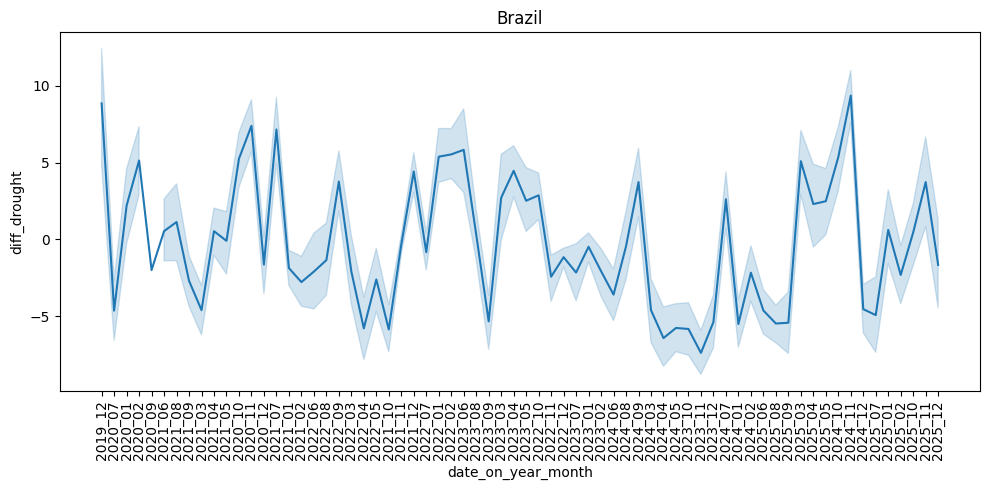

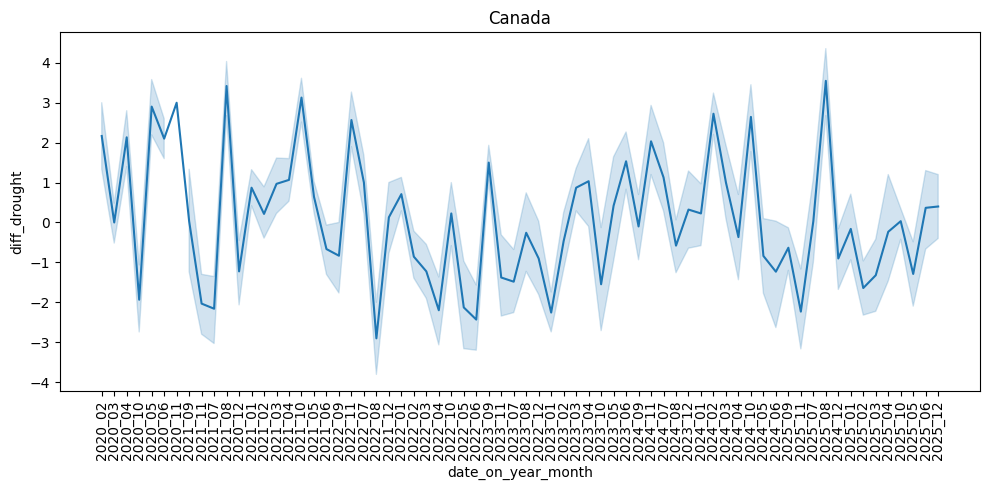

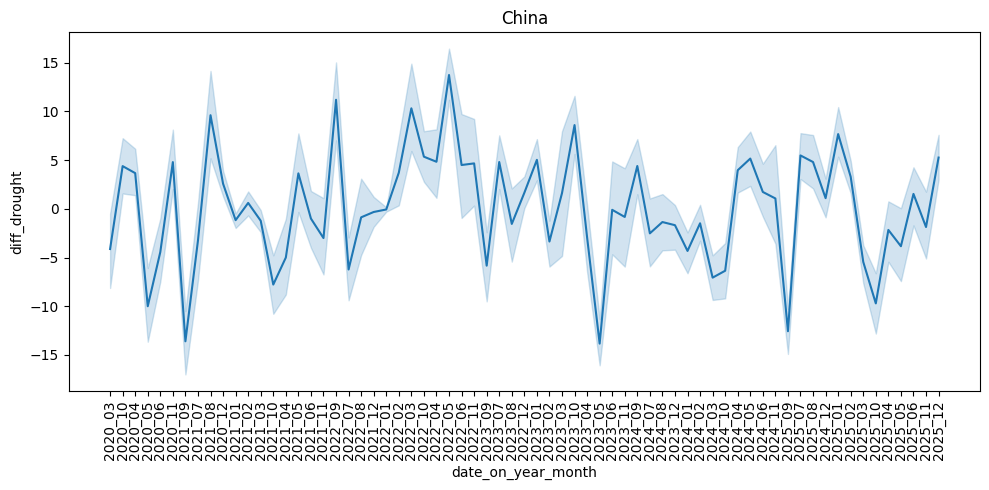

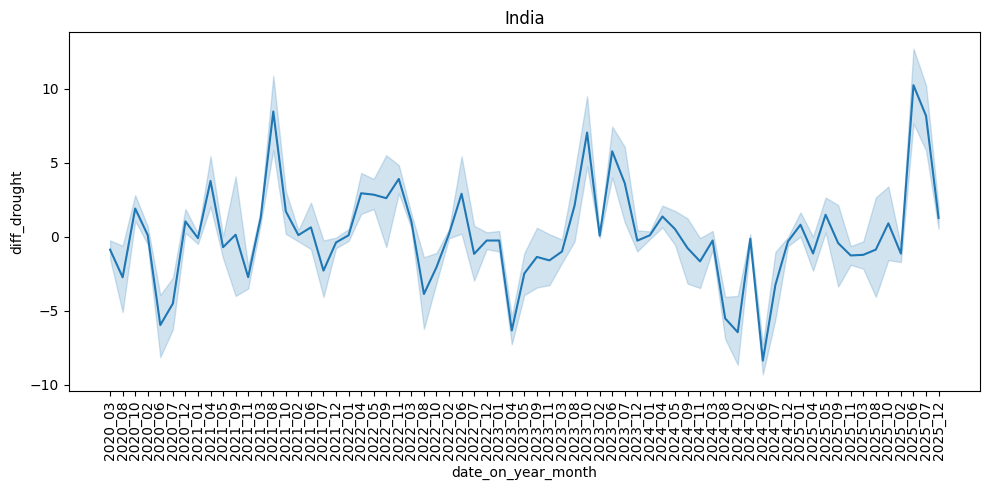

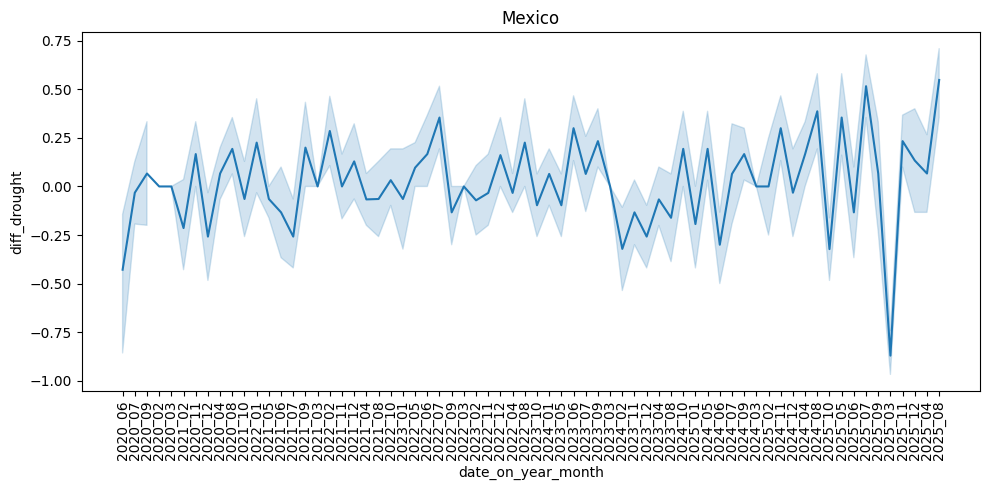

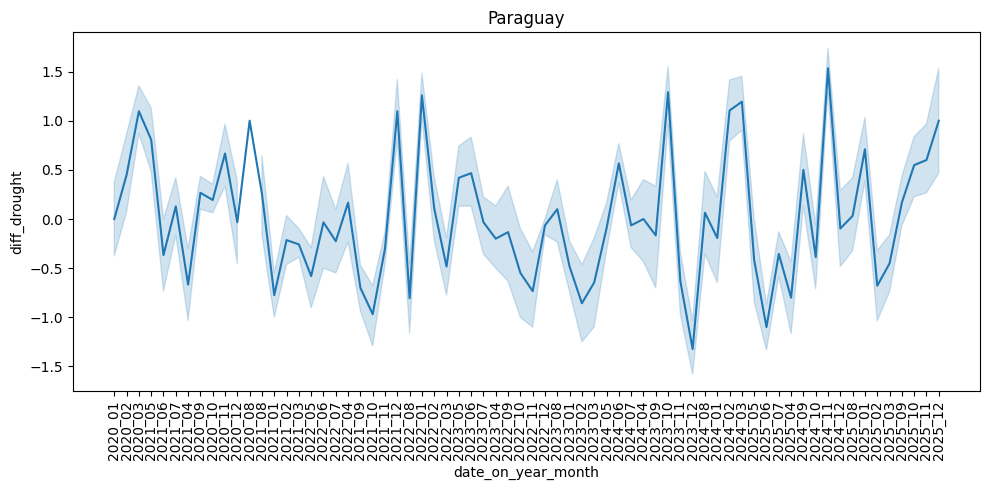

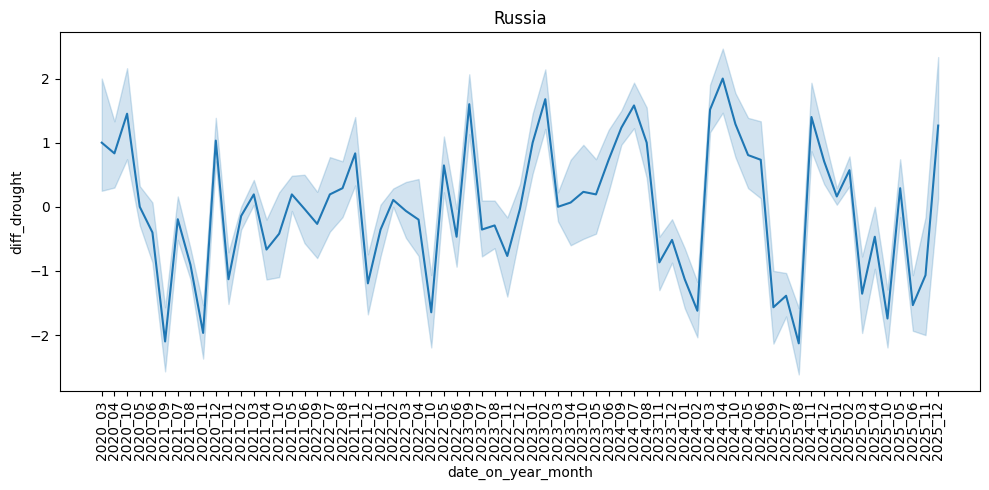

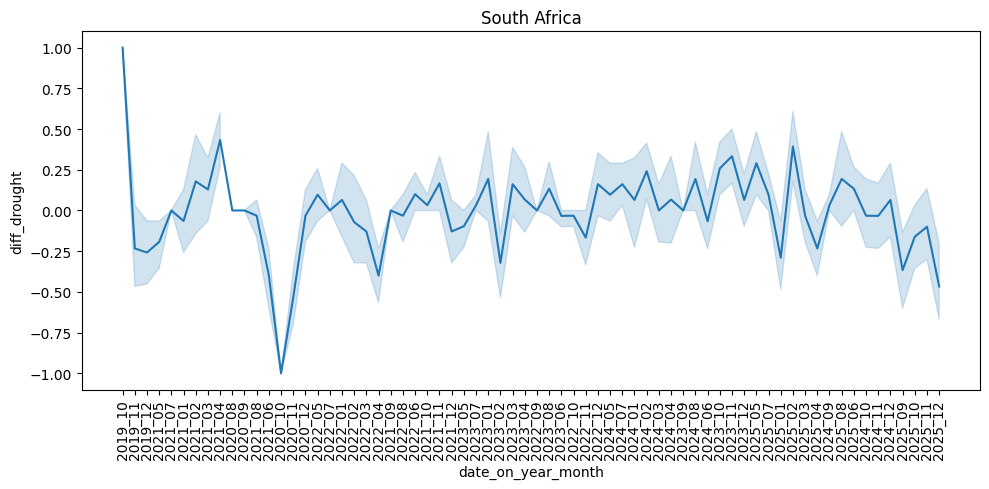

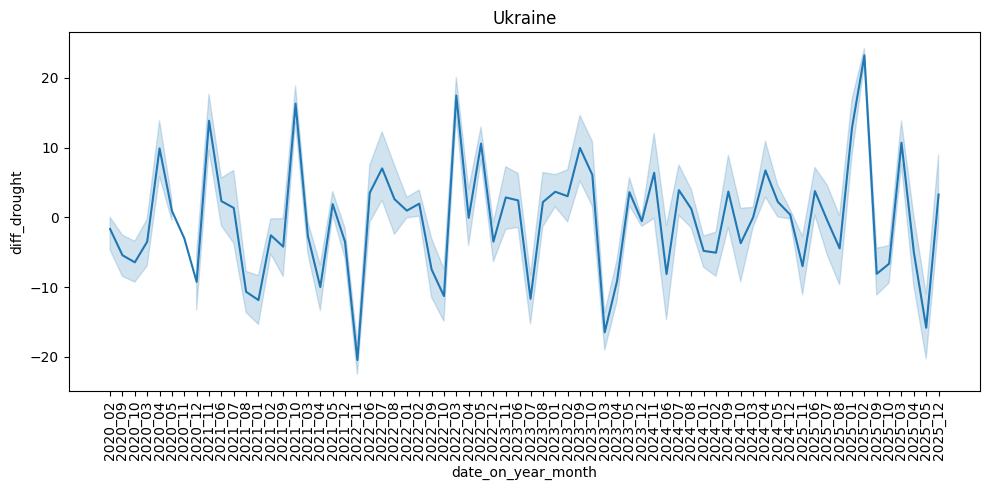

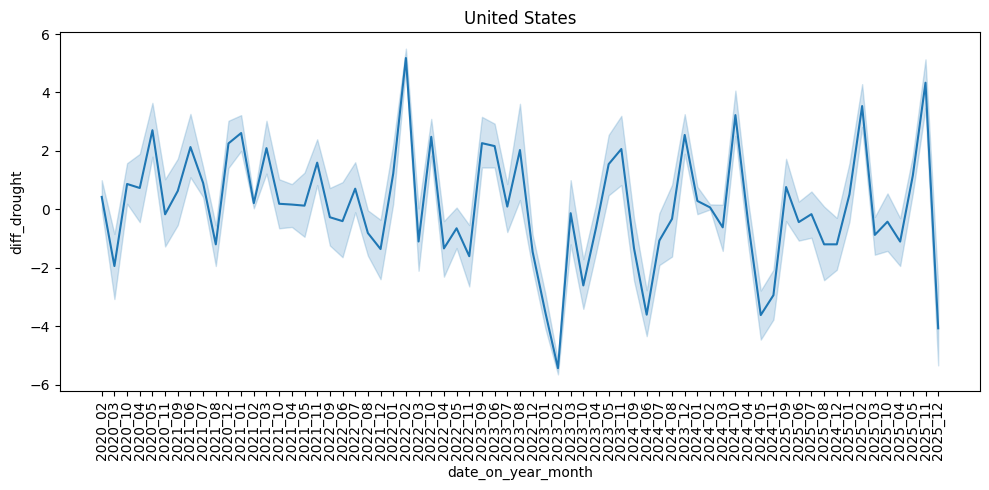

In [34]:
for i, country in enumerate(raw_data['country_name'].unique()):
    country_data = (raw_data[raw_data['country_name'] == country].iloc[-2000:])

    fig, ax = plt.subplots(figsize=(10, 5))

    sns.lineplot(
        ax=ax,
        x=country_data['date_on_year_month'],
        y=country_data['diff_drought']
    )

    ax.tick_params(axis='x', rotation=90)
    ax.set_title(country)

    plt.tight_layout()
    plt.show()

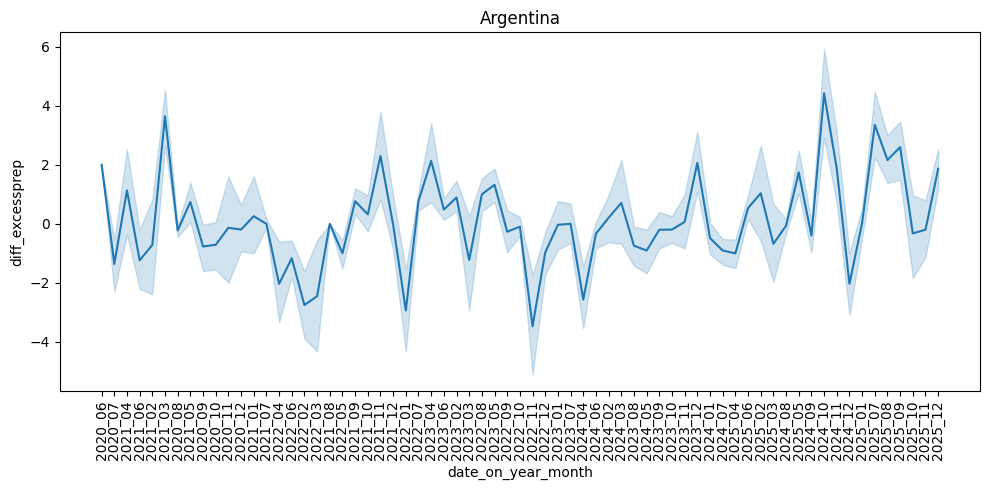

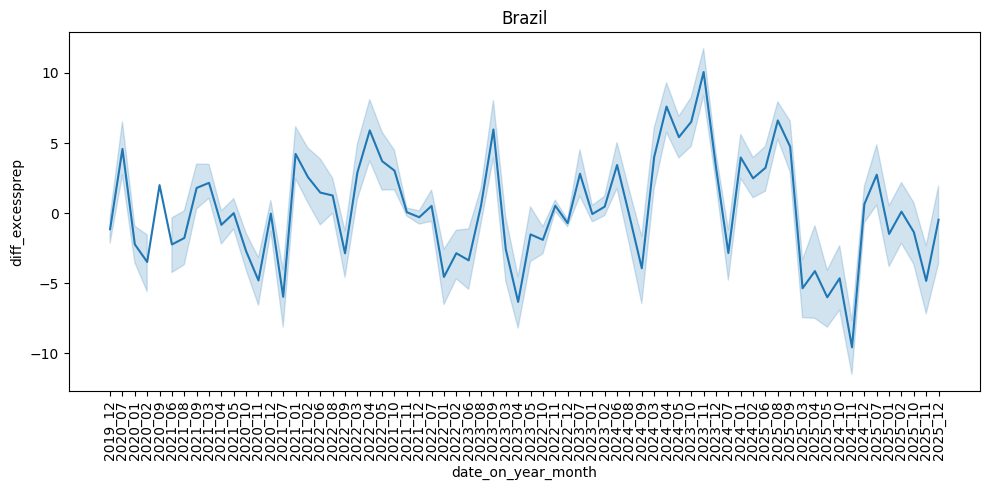

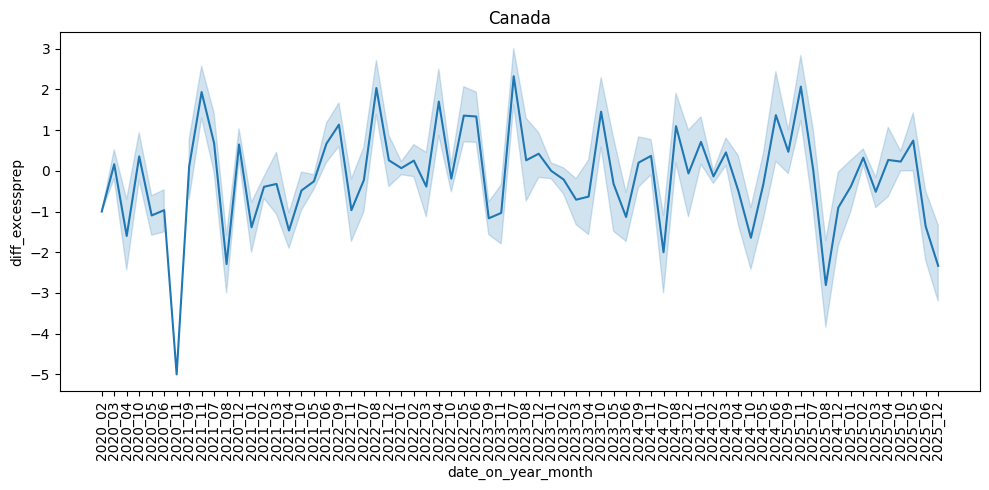

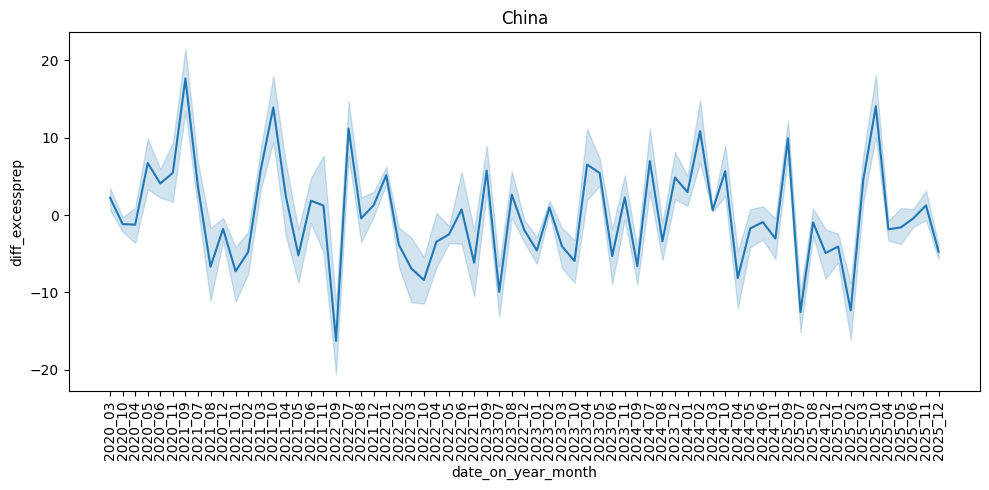

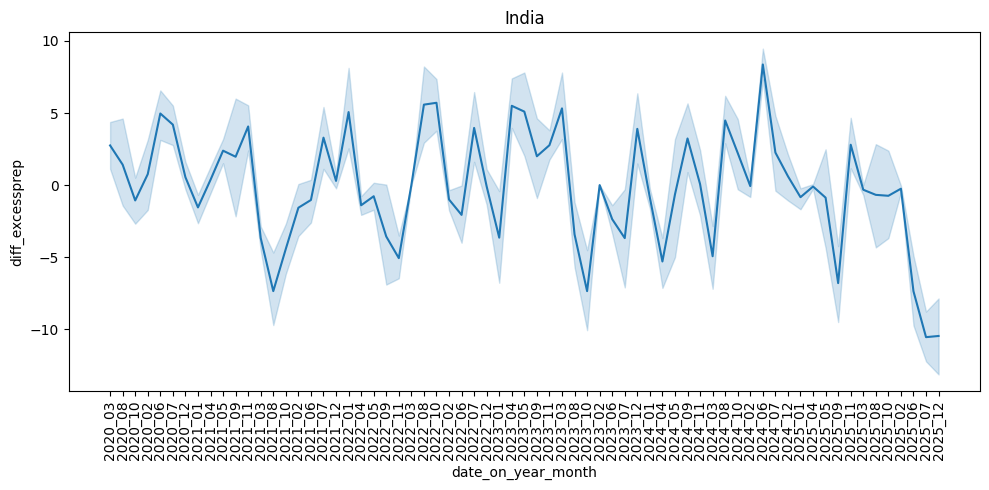

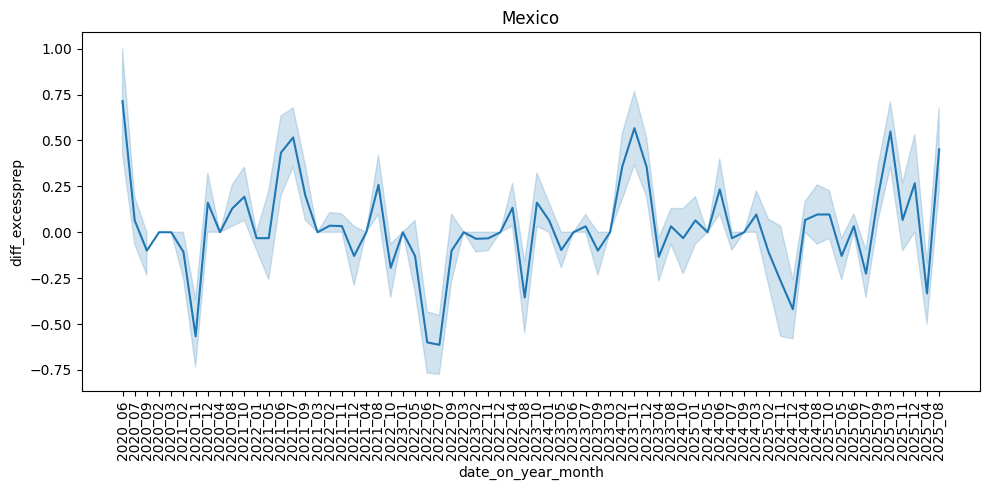

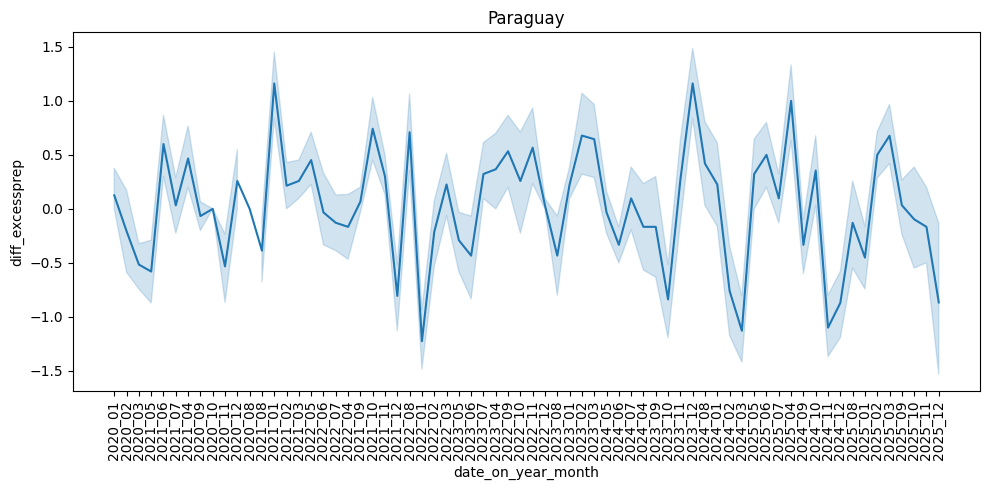

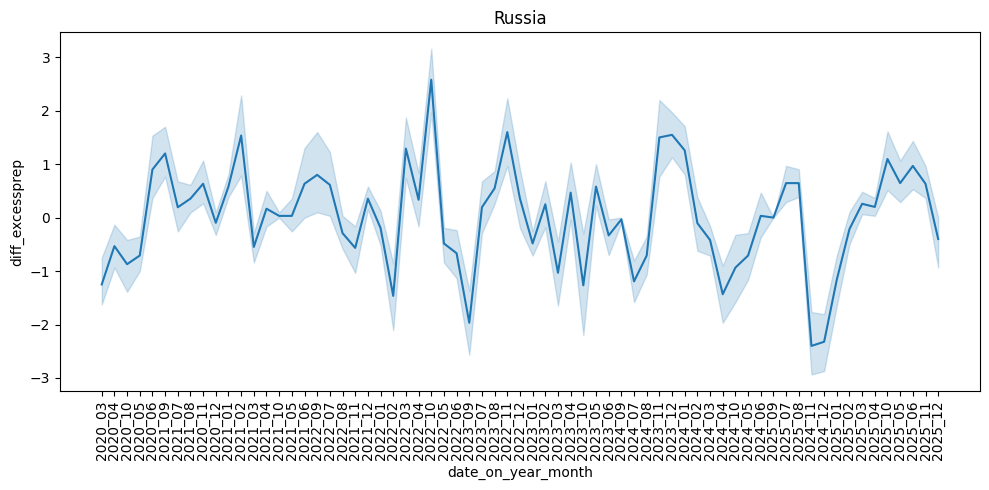

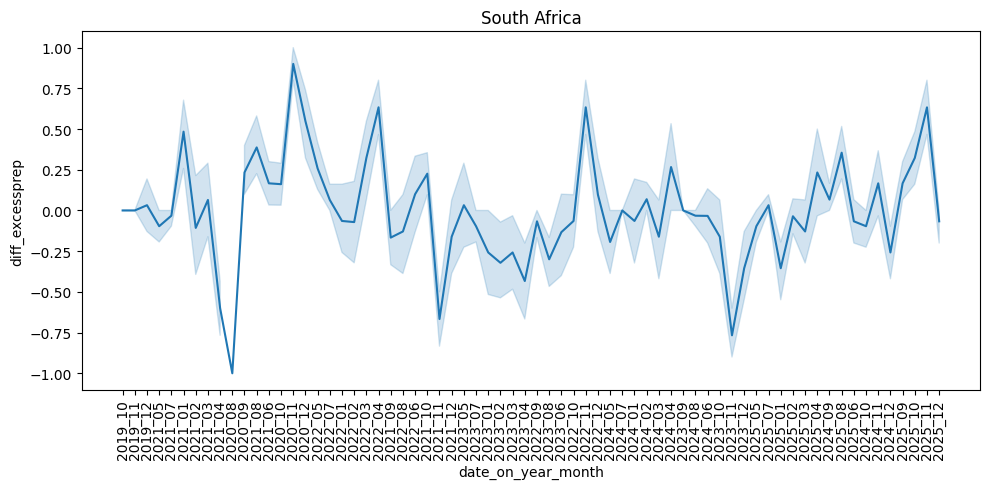

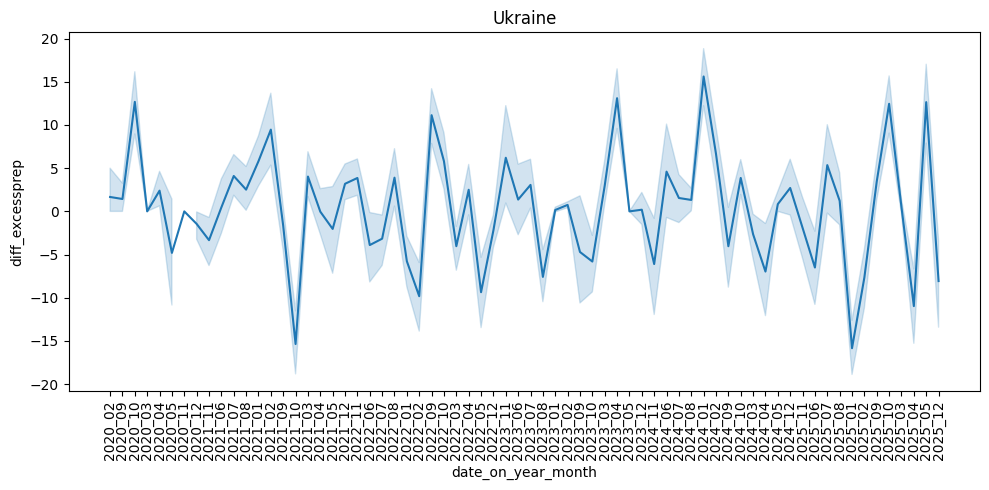

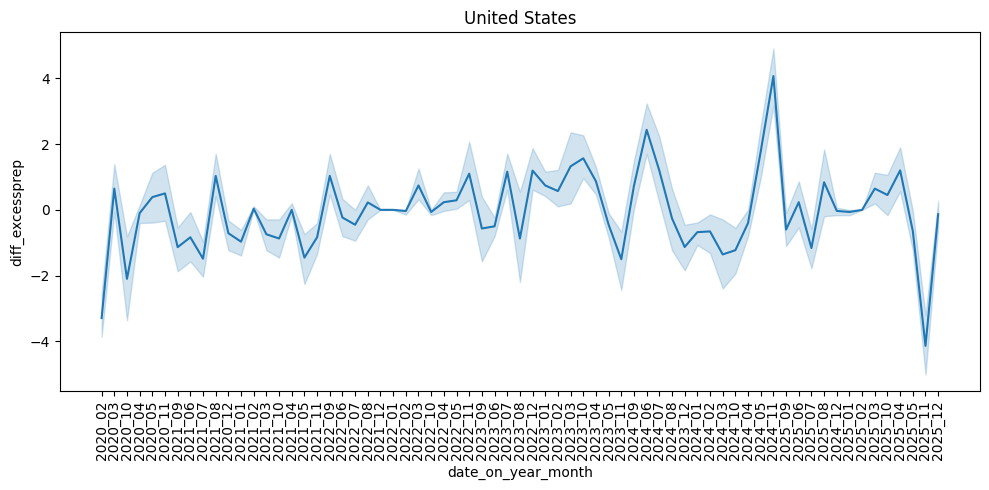

In [46]:
for i, country in enumerate(raw_data['country_name'].unique()):
    country_data = (raw_data[raw_data['country_name'] == country].iloc[-2000:])

    fig, ax = plt.subplots(figsize=(10, 5))

    sns.lineplot(
        ax=ax,
        x=country_data['date_on_year_month'],
        y=country_data['diff_excessprep']
    )

    ax.tick_params(axis='x', rotation=90)
    ax.set_title(country)

    plt.tight_layout()
    plt.show()